# #DuBoisChallenge2024 Challenge 09

Alright, it's time for a Du Bois chart again. This time, I've spent some time explaining the steps and how layering using `zorder` can come in handy sometimes. 

We'll go throug it in three steps:

1. Load the data
2. Test visualisation
3. Final visualisation

But first, we load the required packages:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from colors import dubois_colors
%matplotlib notebook

## 1. Load the data

We first load the challenge data using pandas. 

I split up the data manually to load it as two dataframes:

In [5]:
df = pd.read_csv('2024/challenge09/data.csv')
df

,Year,Slave,Free
0,1790,92.0,8.0
1,1800,88.0,11.0
2,1810,86.5,13.5
3,1820,87.0,13.0
4,1830,86.0,14.0
5,1840,87.0,13.0
6,1850,88.0,12.0
7,1860,89.0,11.0
8,1870,0.0,100.0


That looks okay.

## 2. Test visualisation

The code below shows you how you can plot the data. We'll go with a basic linechart of the free % first. We'll build on that later on.

<IPython.core.display.Javascript object>


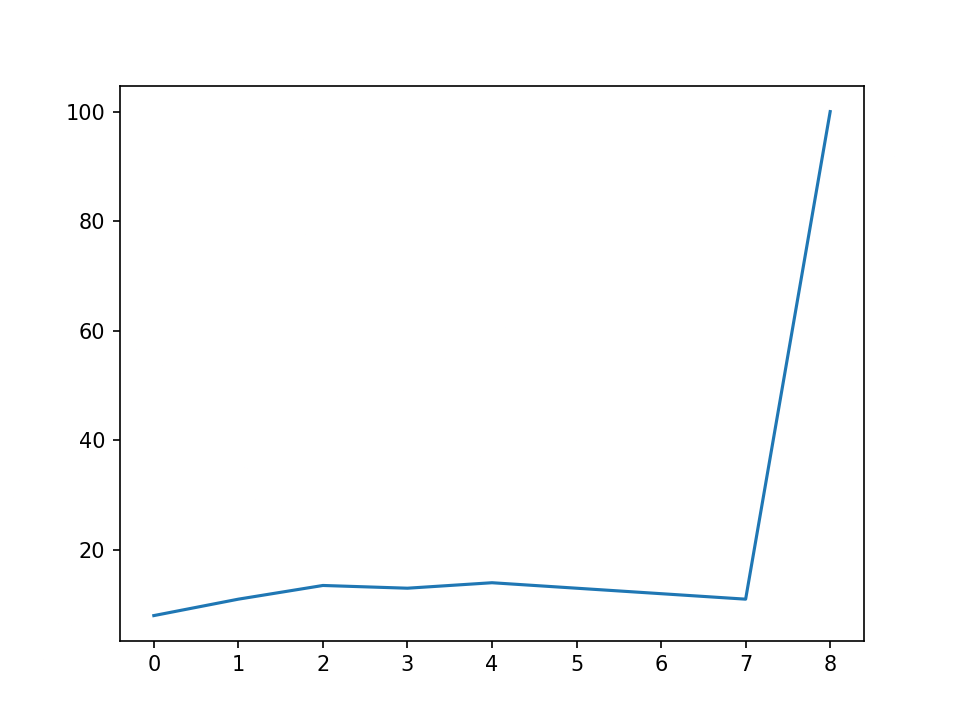

In [6]:
fig, ax = plt.subplots()

ax.plot(
    df['Free'],
)

We'll tweak the visual a bit so it more closely resembles the orignal fill chart. We'll flip the y-axis, limit the range of both axes, and turn it into a fill chart:

<IPython.core.display.Javascript object>


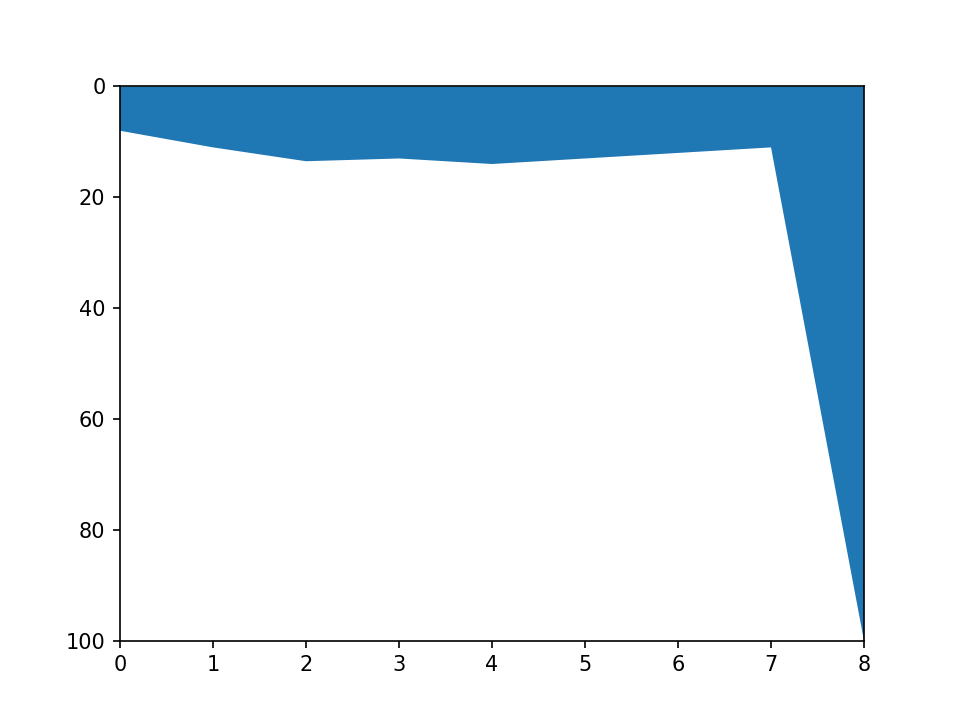

(0.0, 8.0)

In [14]:
fig, ax = plt.subplots()

ax.fill_between(
    df.index.values,
    0,
    df['Free'],
)

ax.set_ylim(100, 0)
ax.set_xlim(0,8)

Alright, let's apply Du Bois's style to it.

## 3. Final visaulisation

This time we're going to leverage the layers in matplotlib using the `zorder` and using face colors. Let's change the aspect ratio and some colors first:

<IPython.core.display.Javascript object>


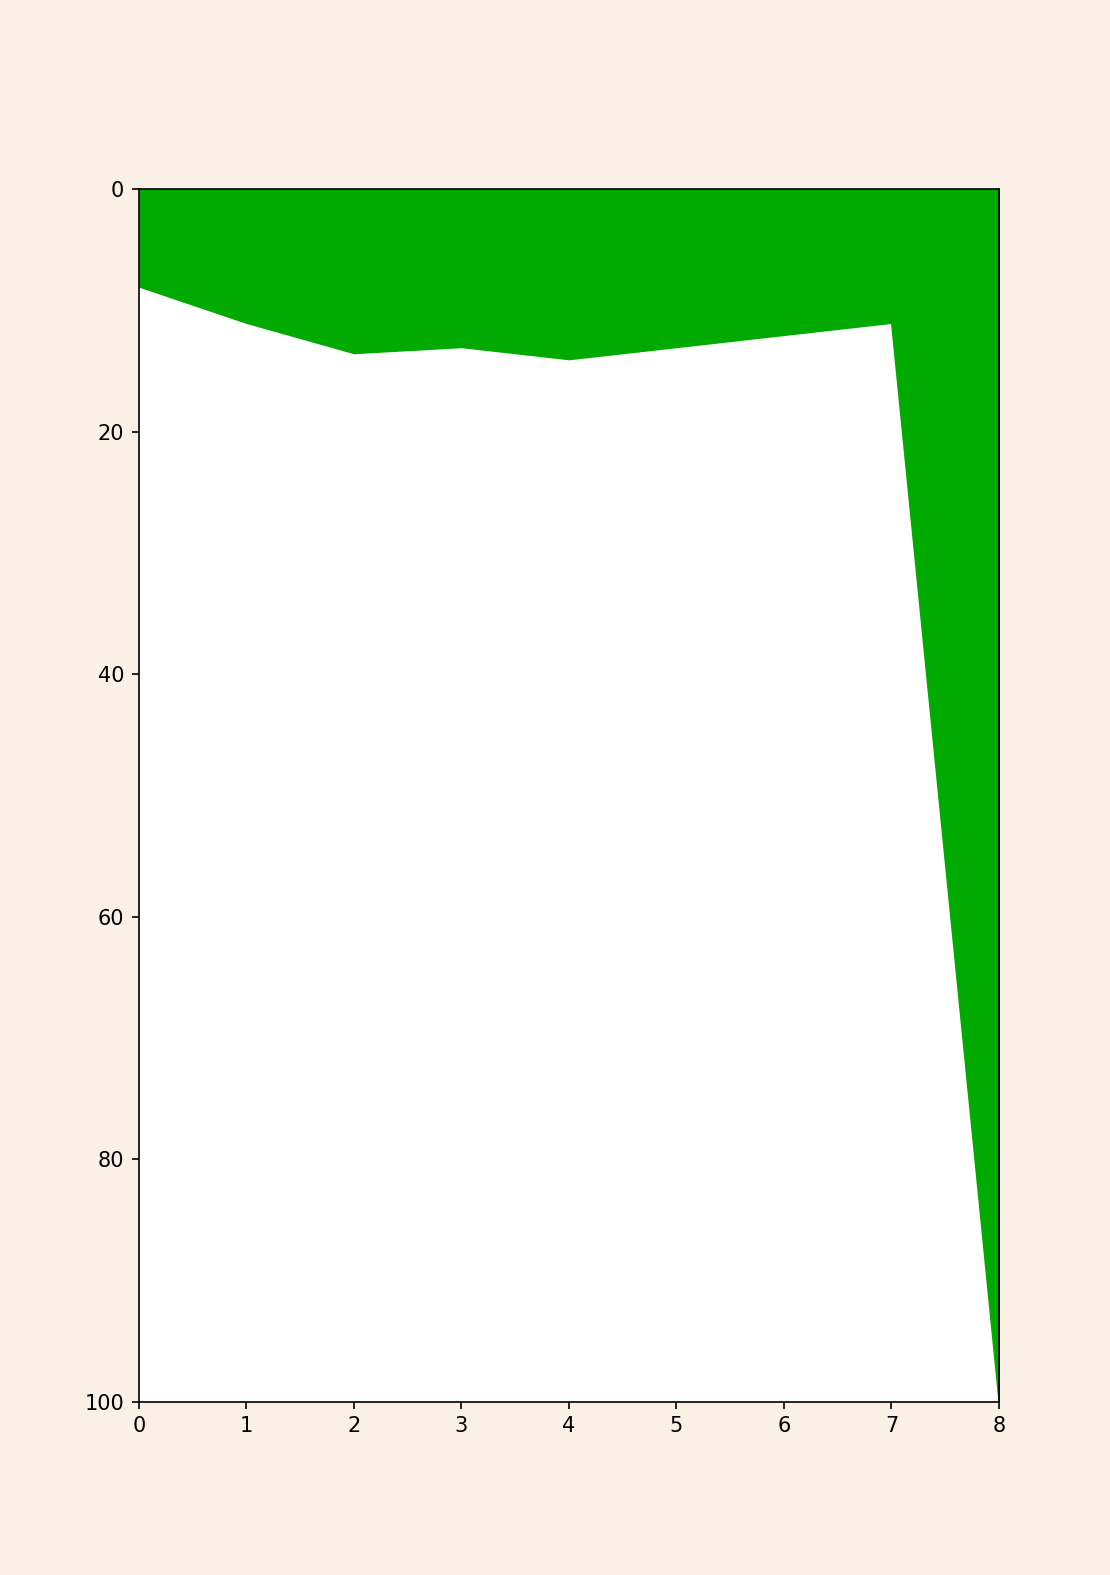

(0.0, 8.0)

In [20]:
fig, ax = plt.subplots(
    figsize=(7.4,10.5), 
    facecolor=dubois_colors['bg']
)

ax.fill_between(
    df.index.values,
    0,
    df['Free'],
    color=dubois_colors['green']
)

ax.set_ylim(100, 0)
ax.set_xlim(0,8)

To fill the other part of the chart, we could either fill that section, but we can also set the background color of the axis:

<IPython.core.display.Javascript object>


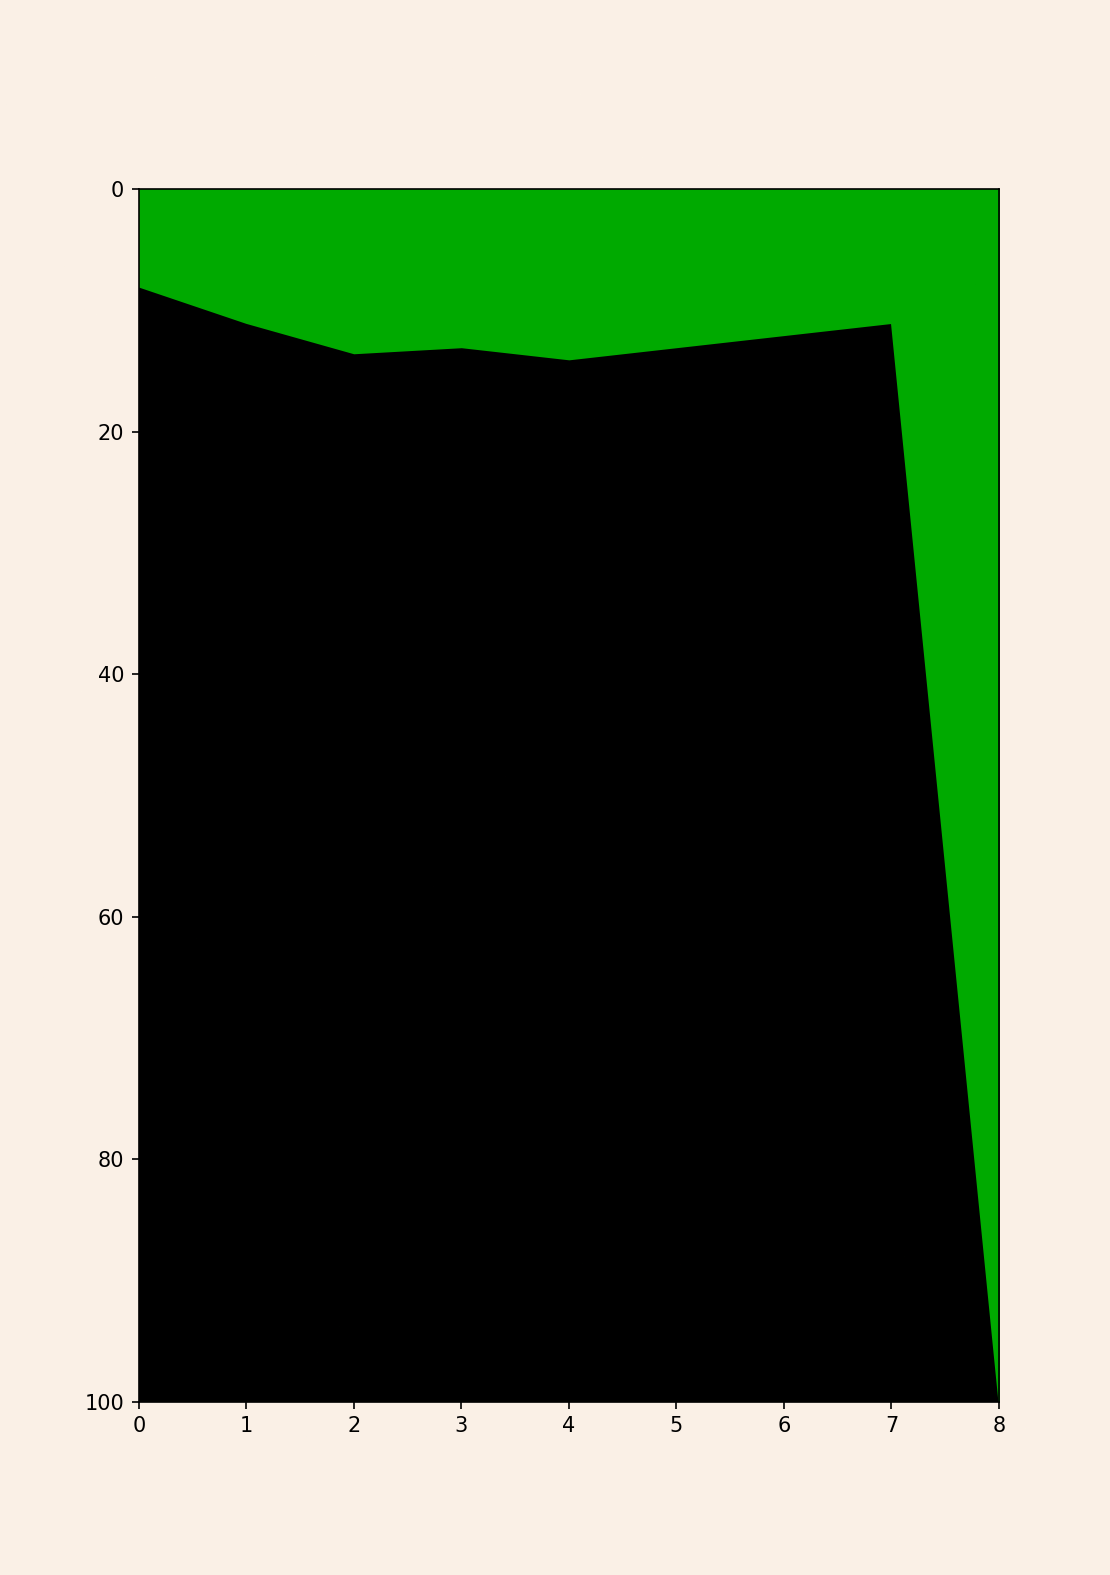

(0.0, 8.0)

In [21]:
fig, ax = plt.subplots(
    figsize=(7.4,10.5), 
    facecolor=dubois_colors['bg']
)

ax.fill_between(
    df.index.values,
    0,
    df['Free'],
    color=dubois_colors['green']
)

ax.set_facecolor(dubois_colors['black'])
ax.set_ylim(100, 0)
ax.set_xlim(0,8)

Next up, we remove the y_tics and change the x_ticks to the years:

<IPython.core.display.Javascript object>


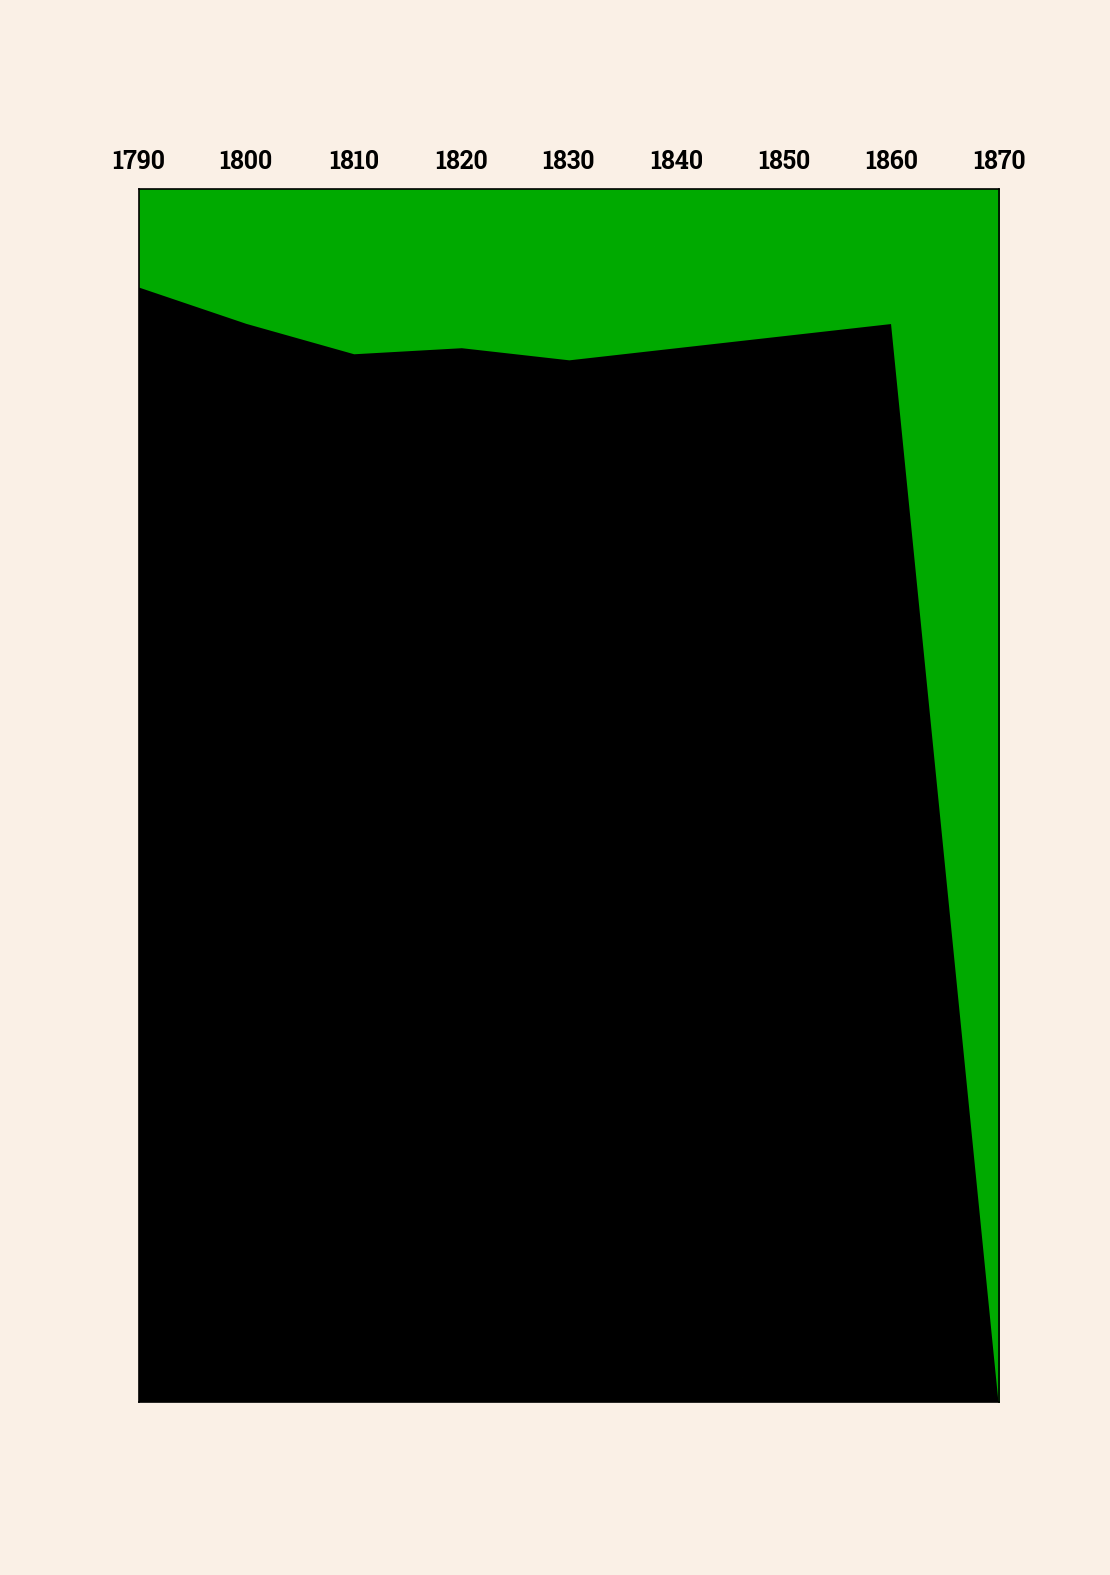

In [29]:
fig, ax = plt.subplots(
    figsize=(7.4,10.5), 
    facecolor=dubois_colors['bg']
)

ax.fill_between(
    df.index.values,
    0,
    df['Free'],
    color=dubois_colors['green']
)

ax.set_facecolor(dubois_colors['black'])
ax.set_ylim(100, 0)
ax.set_xlim(0,8)

data_labels_font = {
    'fontname':'Roboto Slab', 
    'fontweight': 'bold',
    'fontsize': 12
}

# modify y ticks and x ticks
ax.set_yticks([])
ax.set_xticks(
    df.index.values,
    df['Year'],
    **data_labels_font
)

plt.tick_params(
    axis='x',         
    which='both',      
    bottom=False,      
    top=False,  
    labelbottom=False,
    labeltop=True,
)

Next up we add the vertical black lines:

<IPython.core.display.Javascript object>


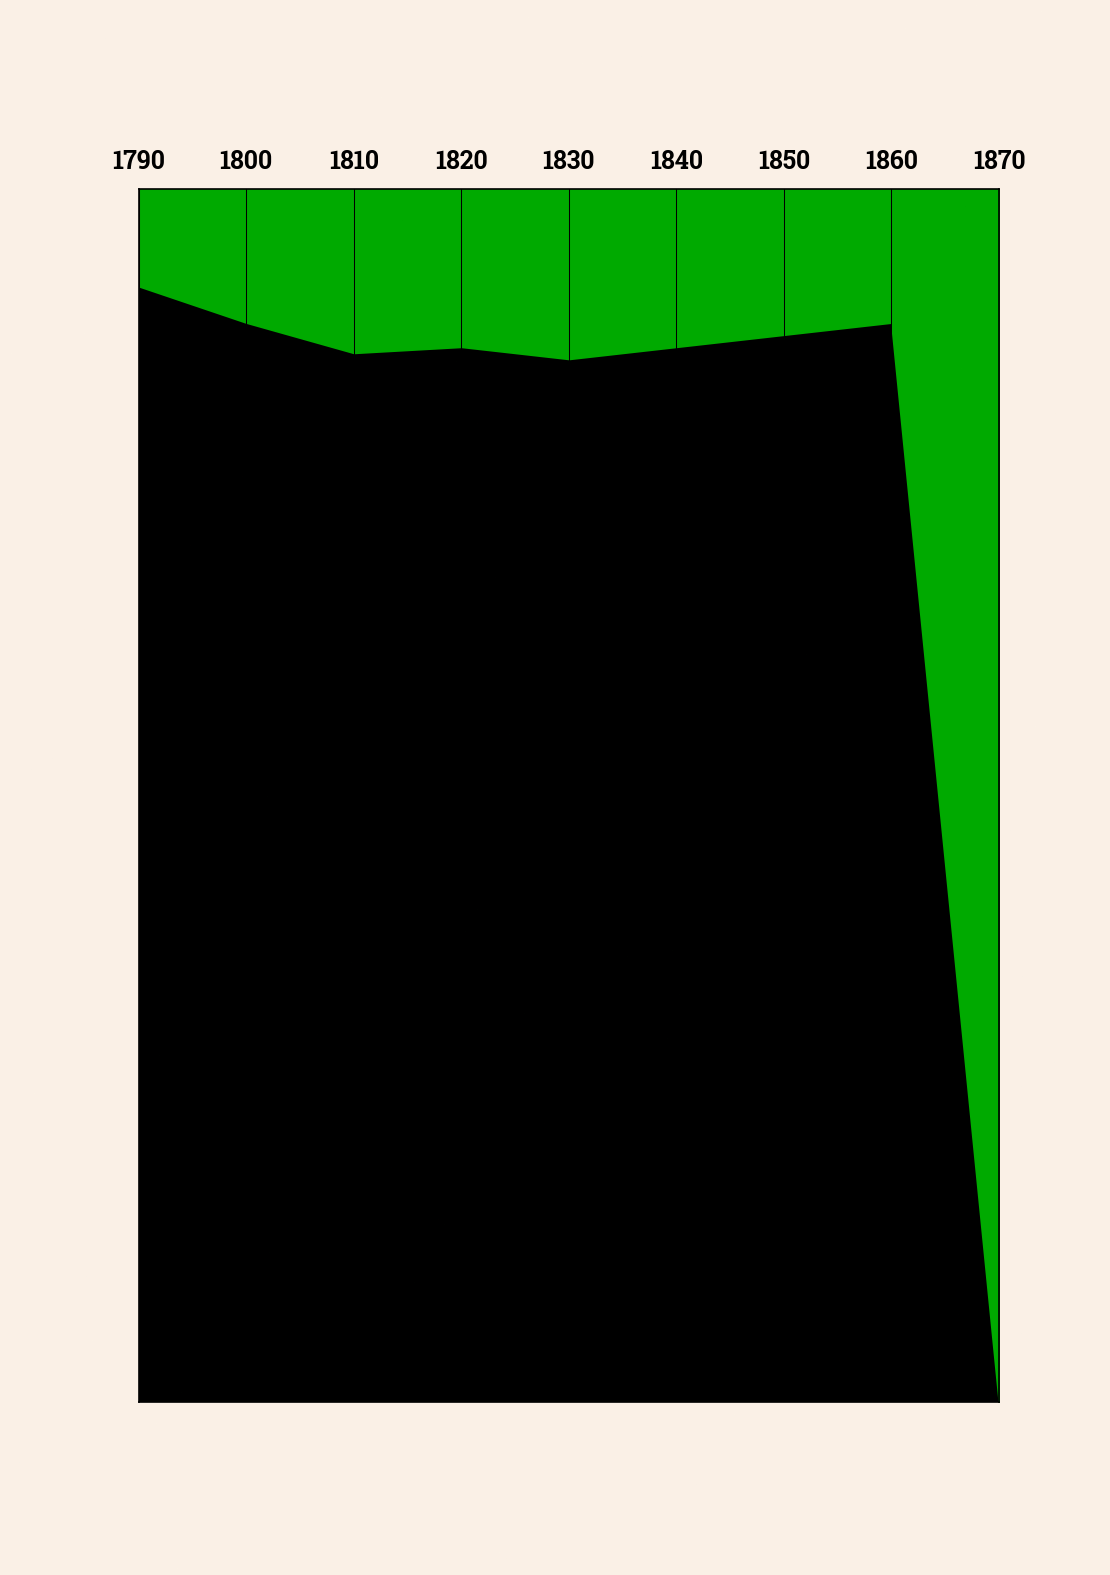

In [61]:
fig, ax = plt.subplots(
    figsize=(7.4,10.5), 
    facecolor=dubois_colors['bg']
)

ax.fill_between(
    df.index.values,
    0,
    df['Free'],
    color=dubois_colors['green']
)

ax.set_facecolor(dubois_colors['black'])
ax.set_ylim(100, 0)
ax.set_xlim(0,8)

data_labels_font = {
    'fontname':'Roboto Slab', 
    'fontweight': 'bold',
    'fontsize': 12
}

ax.set_yticks([])
ax.set_xticks(
    df.index.values,
    df['Year'],
    **data_labels_font
)

plt.tick_params(
    axis='x',         
    which='both',      
    bottom=False,      
    top=False,  
    labelbottom=False,
    labeltop=True,
)

# add vertical lines
for value in df.index.values:
    ax.plot(
        [value, value],
        [0, 100],
        color=dubois_colors['black'],
        lw=.5
    )

And now some data labels:

<IPython.core.display.Javascript object>


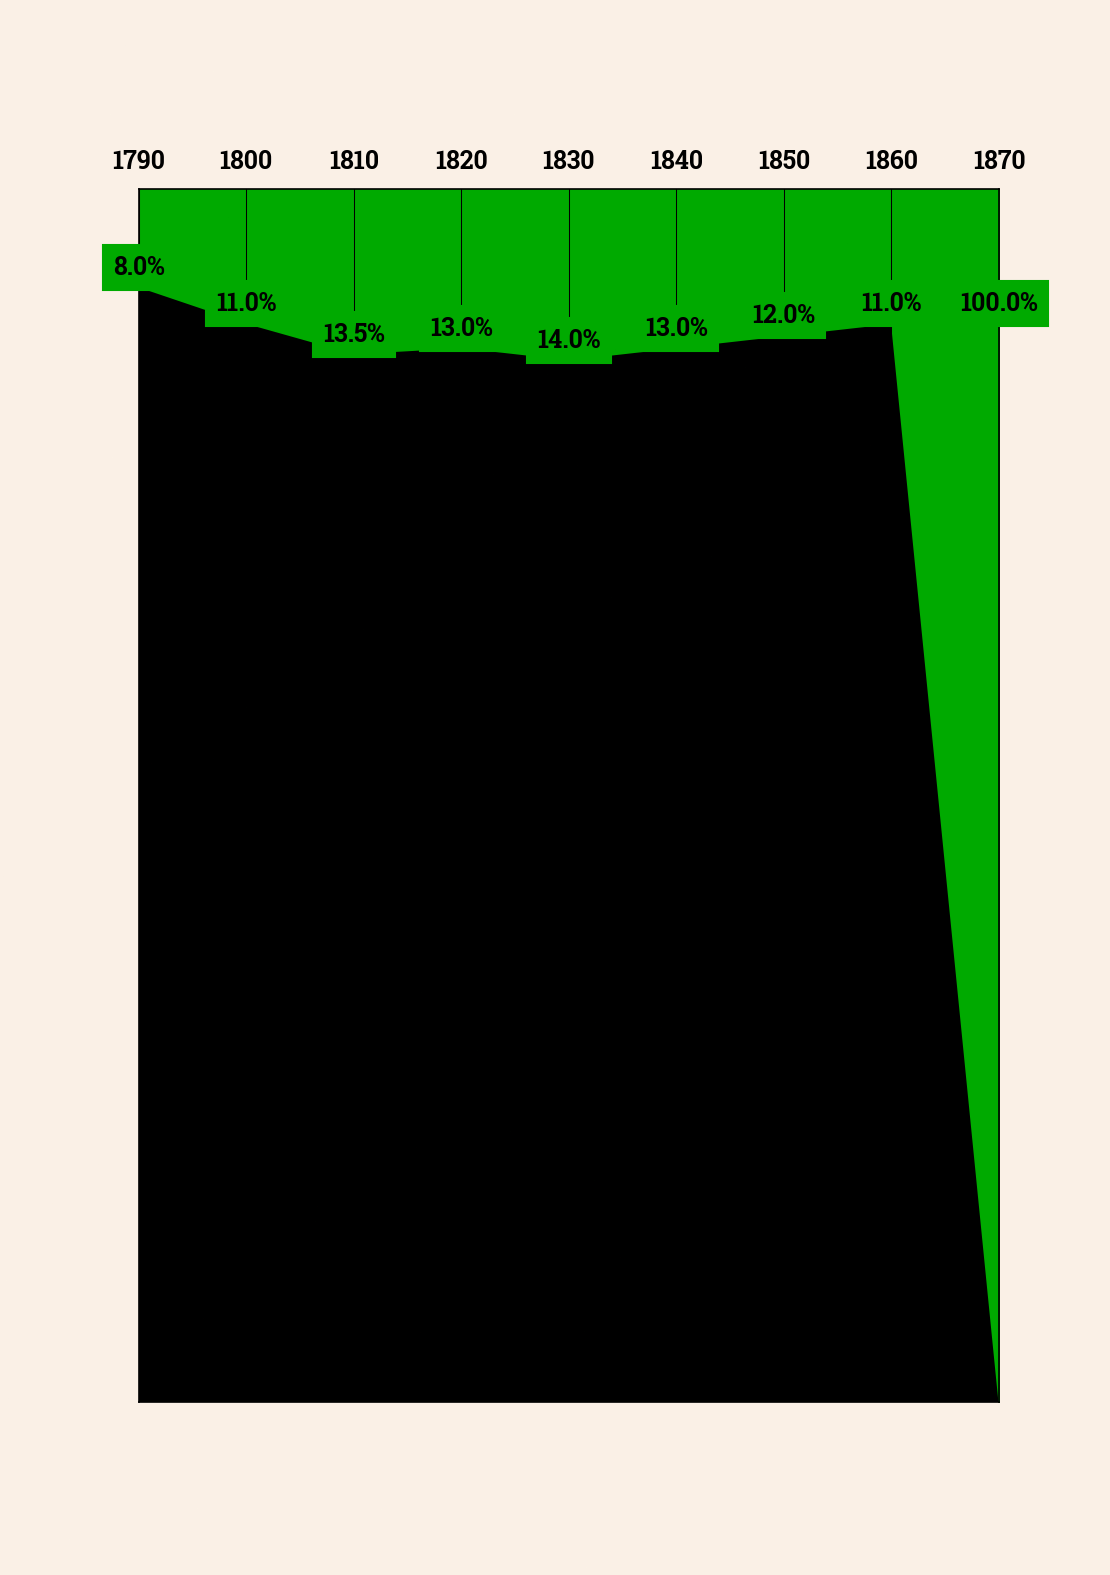

In [107]:
fig, ax = plt.subplots(
    figsize=(7.4,10.5), 
    facecolor=dubois_colors['bg']
)

ax.fill_between(
    df.index.values,
    0,
    df['Free'],
    color=dubois_colors['green']
)

ax.set_facecolor(dubois_colors['black'])
ax.set_ylim(100, 0)
ax.set_xlim(0,8)

data_labels_font = {
    'fontname':'Roboto Slab', 
    'fontweight': 'bold',
    'fontsize': 12
}

ax.set_yticks([])
ax.set_xticks(
    df.index.values,
    df['Year'],
    **data_labels_font
)

plt.tick_params(
    axis='x',         
    which='both',      
    bottom=False,      
    top=False,  
    labelbottom=False,
    labeltop=True,
)

for value in df.index.values:
    ax.plot(
        [value, value],
        [0, 100],
        color=dubois_colors['black'],
        lw=.5
    )
    
# add data labels
for index, row in df.iterrows():
    y_pos = row['Free']
    
    if y_pos == 100:
        y_pos = df['Free'][index-1]
                
    ax.text(
        index, 
        y_pos-.5,
        s=f'{str(row["Free"])}%',
        backgroundcolor=dubois_colors['green'],
        ha='center',
        va='bottom',
        **data_labels_font
    )

The original design has a green area behind the data labels (for all values except the first and last). The default `backgroundcolor` does not really work. So I'll replace that by using a scatter plot with squares:

<IPython.core.display.Javascript object>


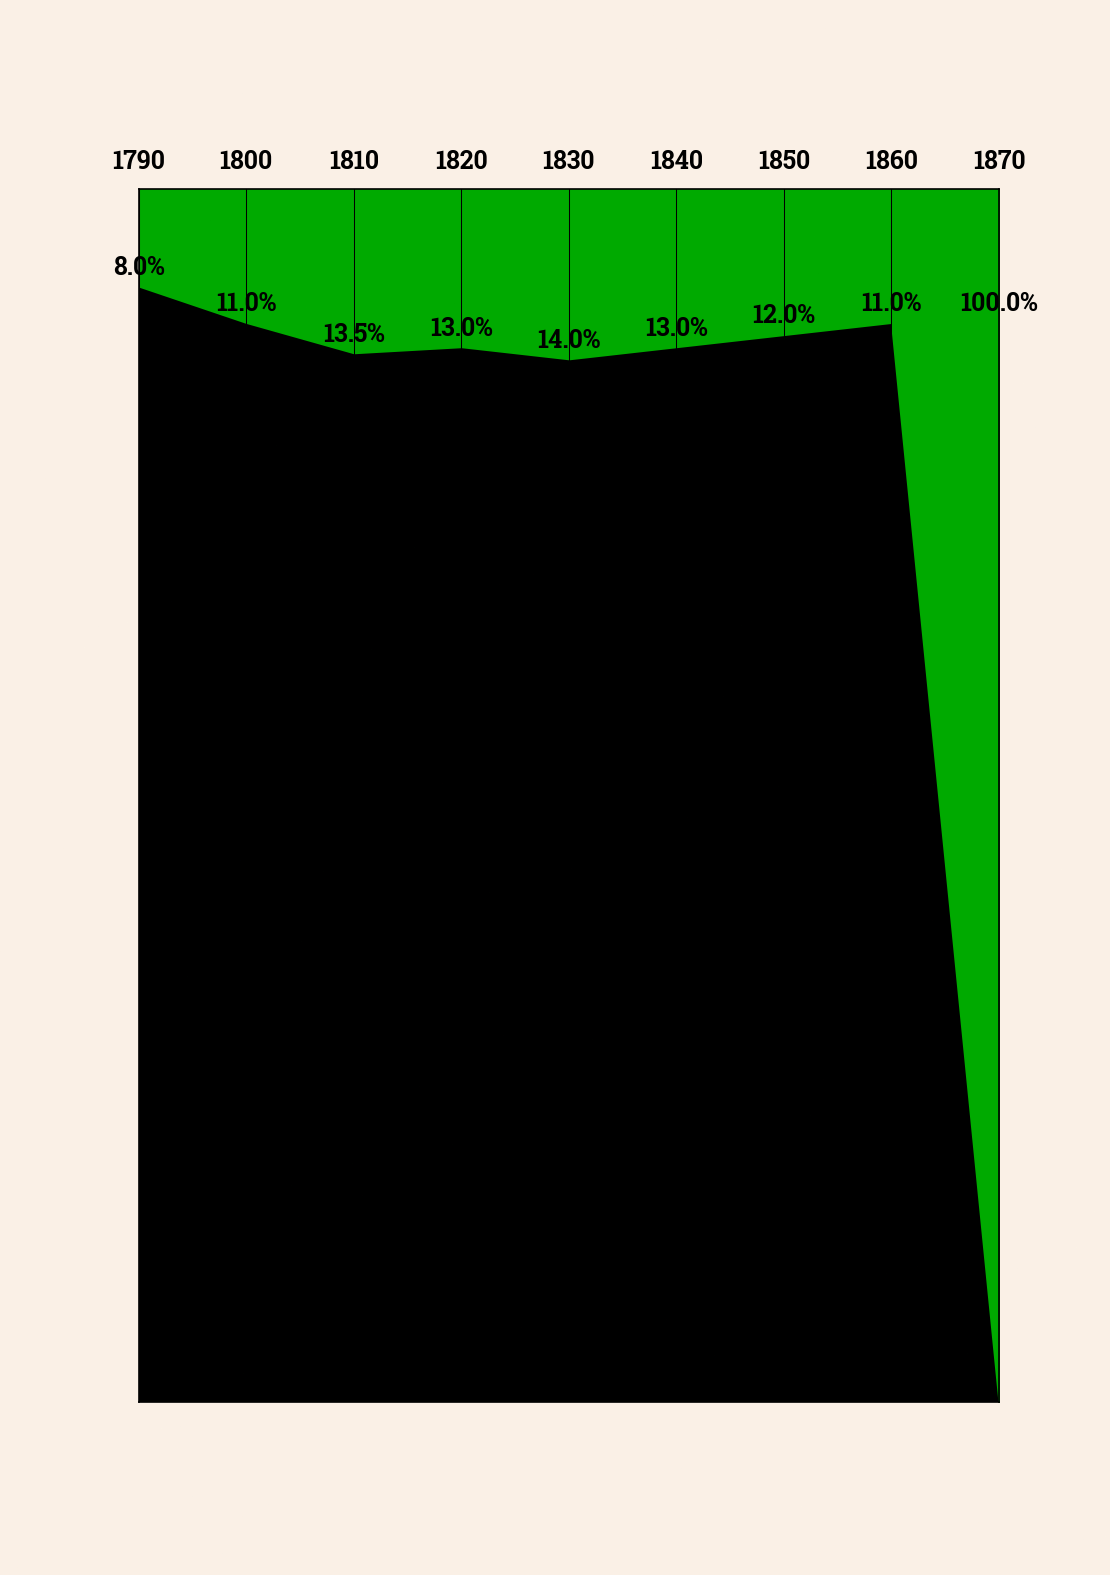

In [113]:
fig, ax = plt.subplots(
    figsize=(7.4,10.5), 
    facecolor=dubois_colors['bg']
)

ax.fill_between(
    df.index.values,
    0,
    df['Free'],
    color=dubois_colors['green']
)

ax.set_facecolor(dubois_colors['black'])
ax.set_ylim(100, 0)
ax.set_xlim(0,8)

data_labels_font = {
    'fontname':'Roboto Slab', 
    'fontweight': 'bold',
    'fontsize': 12
}

ax.set_yticks([])
ax.set_xticks(
    df.index.values,
    df['Year'],
    **data_labels_font
)

plt.tick_params(
    axis='x',         
    which='both',      
    bottom=False,      
    top=False,  
    labelbottom=False,
    labeltop=True,
)

for value in df.index.values:
    ax.plot(
        [value, value],
        [0, 100],
        color=dubois_colors['black'],
        lw=.5
    )
    
# add data labels
for index, row in df.iterrows():
    y_pos = row['Free']
    
    if y_pos == 100:
        y_pos = df['Free'][index-1]
                
    ax.text(
        index, 
        y_pos-.5,
        s=f'{str(row["Free"])}%',
#         backgroundcolor=dubois_colors['green'],
        ha='center',
        va='bottom',
        **data_labels_font
    )
    
    # skip scatter if first or last item
    if index in [0, len(df)-1]:
        continue
        
    ax.scatter(
        index,
        y_pos-1.6,
        color=dubois_colors['green'],
        marker='s',
        s=120,
    )

Now this is interesting, we don't see the scatter plot. This is because the plot lines are plotted on top. To change this, we'll change the zorder for all the lines, text and scatter elements:

<IPython.core.display.Javascript object>


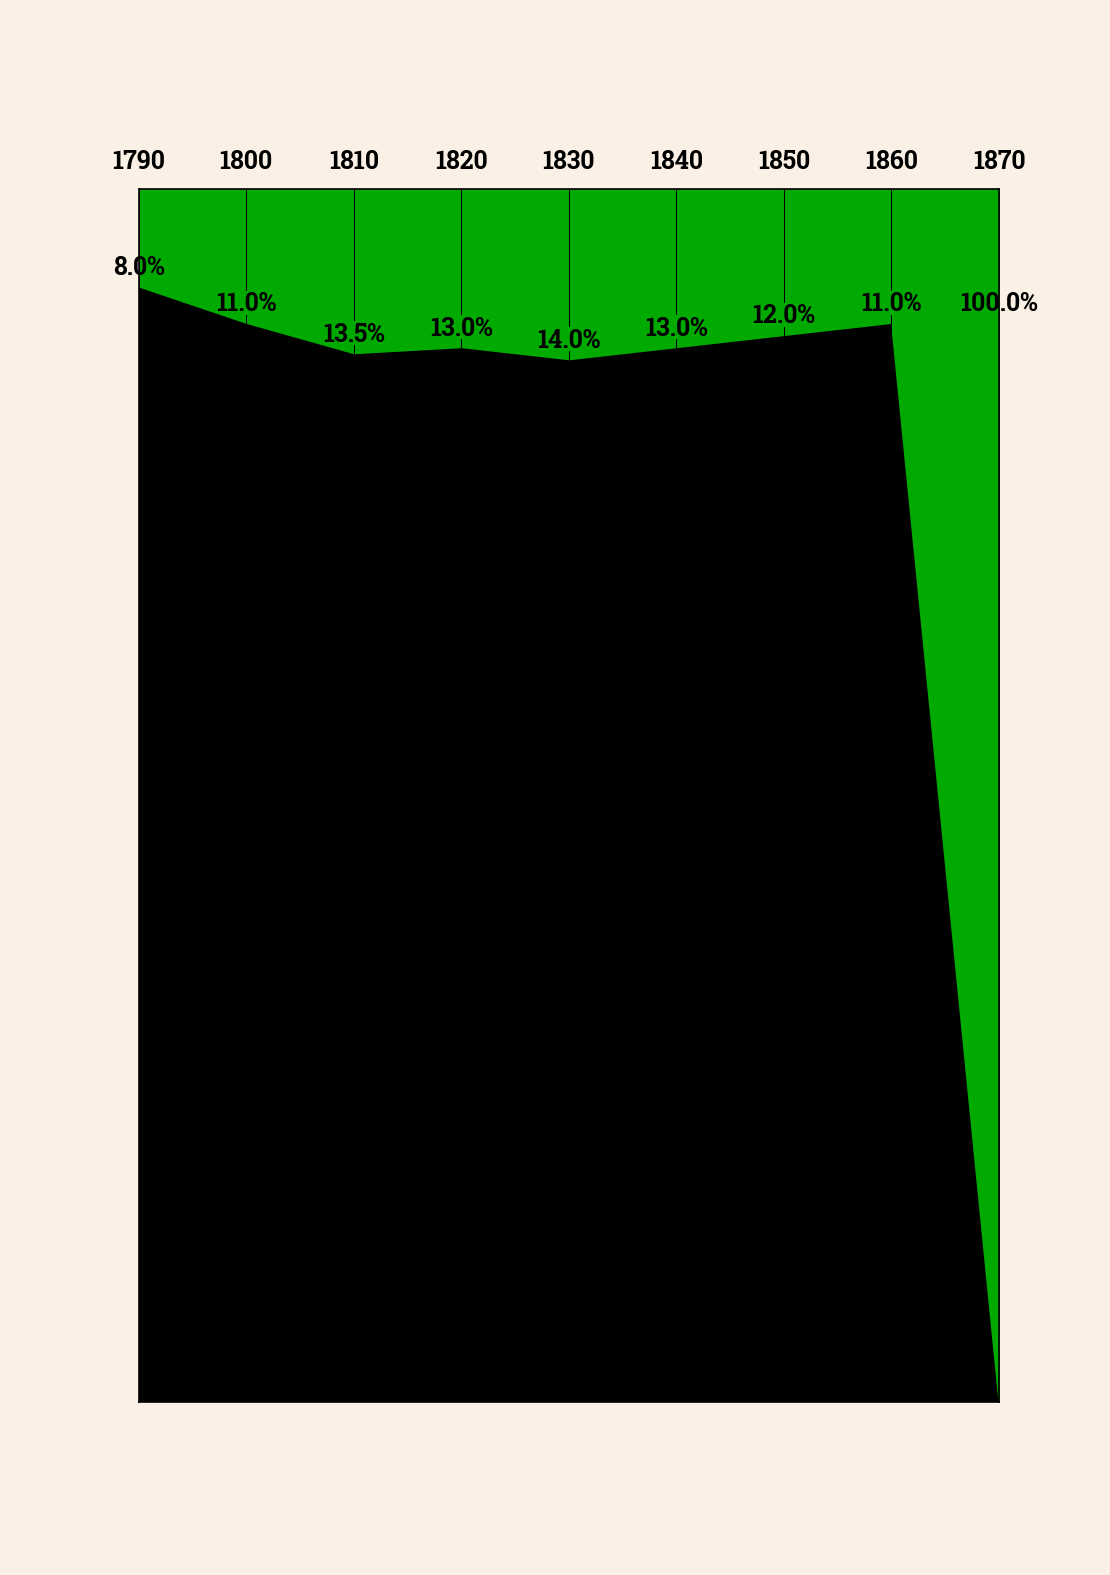

In [114]:
fig, ax = plt.subplots(
    figsize=(7.4,10.5), 
    facecolor=dubois_colors['bg']
)

ax.fill_between(
    df.index.values,
    0,
    df['Free'],
    color=dubois_colors['green']
)

ax.set_facecolor(dubois_colors['black'])
ax.set_ylim(100, 0)
ax.set_xlim(0,8)

data_labels_font = {
    'fontname':'Roboto Slab', 
    'fontweight': 'bold',
    'fontsize': 12
}

ax.set_yticks([])
ax.set_xticks(
    df.index.values,
    df['Year'],
    **data_labels_font
)

plt.tick_params(
    axis='x',         
    which='both',      
    bottom=False,      
    top=False,  
    labelbottom=False,
    labeltop=True,
)

for value in df.index.values:
    ax.plot(
        [value, value],
        [0, 100],
        color=dubois_colors['black'],
        lw=.5,
        # zorder here
        zorder=1
    )
    
for index, row in df.iterrows():
    y_pos = row['Free']
    
    if y_pos == 100:
        y_pos = df['Free'][index-1]
                
    ax.text(
        index, 
        y_pos-.5,
        s=f'{str(row["Free"])}%',
        ha='center',
        va='bottom',
        # zorder here
        zorder=10,
        **data_labels_font
    )
    
    if index in [0, len(df)-1]:
        continue
        
    ax.scatter(
        index,
        y_pos-1.6,
        color=dubois_colors['green'],
        marker='s',
        s=120,
        # zorder here
        zorder=5,
    )

Alright, let's wrap it up by adding the titles, plot area title and changing the margins:

<IPython.core.display.Javascript object>


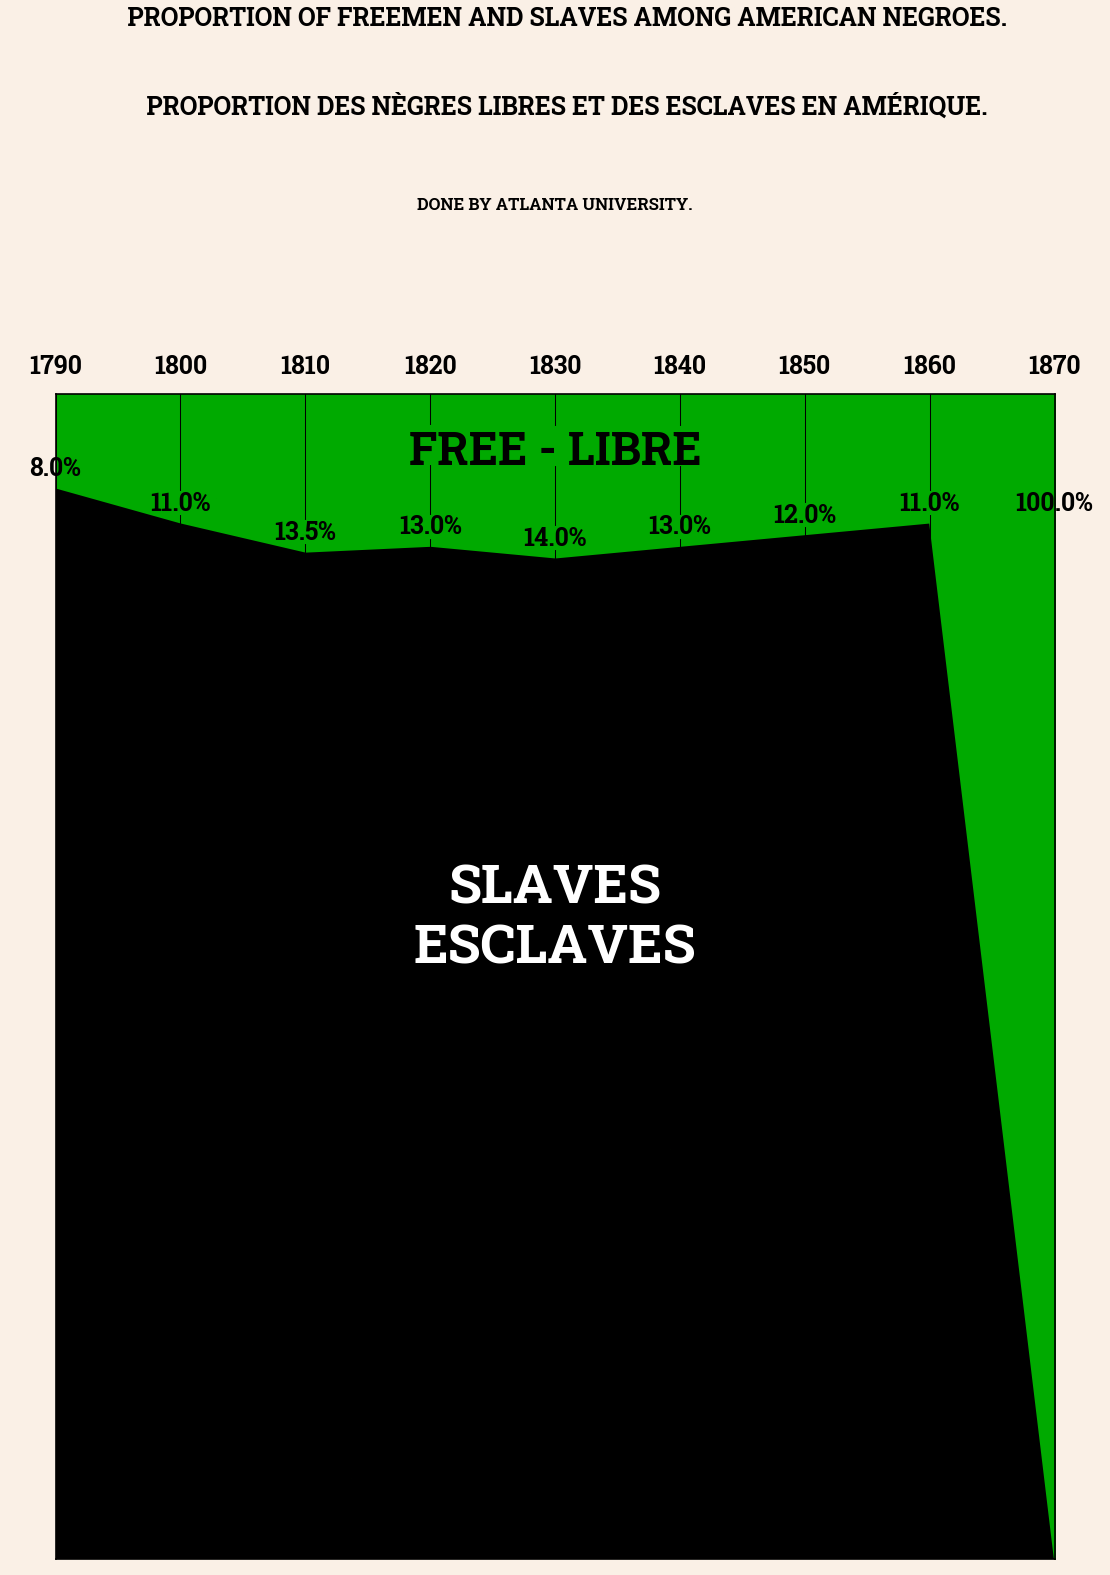

In [127]:
fig, ax = plt.subplots(
    figsize=(7.4,10.5), 
    facecolor=dubois_colors['bg']
)

ax.fill_between(
    df.index.values,
    0,
    df['Free'],
    color=dubois_colors['green']
)

ax.set_facecolor(dubois_colors['black'])
ax.set_ylim(100, 0)
ax.set_xlim(0,8)

data_labels_font = {
    'fontname':'Roboto Slab', 
    'fontweight': 'bold',
    'fontsize': 12
}

ax.set_yticks([])
ax.set_xticks(
    df.index.values,
    df['Year'],
    **data_labels_font
)

plt.tick_params(
    axis='x',         
    which='both',      
    bottom=False,      
    top=False,  
    labelbottom=False,
    labeltop=True,
)

for value in df.index.values:
    ax.plot(
        [value, value],
        [0, 100],
        color=dubois_colors['black'],
        lw=.5,
        # zorder here
        zorder=1
    )
    
for index, row in df.iterrows():
    y_pos = row['Free']
    
    if y_pos == 100:
        y_pos = df['Free'][index-1]
                
    ax.text(
        index, 
        y_pos-.5,
        s=f'{str(row["Free"])}%',
        ha='center',
        va='bottom',
        # zorder here
        zorder=10,
        **data_labels_font
    )
    
    if index in [0, len(df)-1]:
        continue
        
    ax.scatter(
        index,
        y_pos-1.6,
        color=dubois_colors['green'],
        marker='s',
        s=120,
        zorder=5,
    )

data_labels_font['fontsize'] = 12
plt.text(
    x=.5,
    y=.96,
    s='''
    PROPORTION OF FREEMEN AND SLAVES AMONG AMERICAN NEGROES.
    \n
    PROPORTION DES NÈGRES LIBRES ET DES ESCLAVES EN AMÉRIQUE.
    ''',
    va='center',
    ha='center',
    transform=fig.transFigure,
    **data_labels_font
)

data_labels_font['fontsize'] = 8
plt.text(
    x=.5,
    y=.87,
    s='DONE BY ATLANTA UNIVERSITY.',
    va='center',
    ha='center',
    transform=fig.transFigure,
    **data_labels_font
)
    
# add area labels here
data_labels_font['fontsize'] = 22
ax.text(
    x=max(df.index.values)/2,
    y=5,
    ha='center',
    va='center',
    s='FREE - LIBRE',
    zorder=10,
    **data_labels_font
)
# again add some background color here
ax.scatter(
    [3,4,5],
    [4.4, 4.5, 4.5],
    color=dubois_colors['green'],
    marker='s',
    s=320,
    zorder=5,
)

data_labels_font['fontsize'] = 26
data_labels_font['color'] = 'white'
ax.text(
    x=max(df.index.values)/2,
    y=45,
    ha='center',
    va='center',
    s='SLAVES\nESCLAVES',
    **data_labels_font
)

# modify plot margins
plt.subplots_adjust(left=.05, right=.95, bottom=.01, top=.75)

Alright, that's challenge 9 of 10 done!